---   

<h1 align="center">Introduction to Data Analyst and Data Science for beginners</h1>
<h1 align="center">Lecture no 2.17(Pandas-08)</h1>

---
<h3><div align="right">Ehtisham Sadiq</div></h3>    

<img align="right" width="400" height="400"  src="images/pandas-apps.png"  >

## _Handling Missing Data.ipynb_

## Learning agenda of this notebook

1. Have an insight about the Dataset
2. Identify the Columns having Null/Missing values using `df.isna()` method
3. Handle/Impute the Null/Missing Values under the `math` Column using `df.loc[mask,col]=value`
4. Handle/Impute the Null/Missing Values under the `group` Column using `df.loc[mask,col]=value`
5. Handle Missing values under a Numeric/Categorical Column using `fillna()`
6. Handle Repeating Values (for same information) under the `session` Column
7. Create a new Column by Modifying an Existing Column
8. Delete Rows Having NaN values using `df.dropna()` method
9. Convert Categorical Variables into Numerical

## 1. Have an Insight about the Dataset

In [1]:
! cat datasets/group-marks.csv



















































MS50,KAKAMANNA,male,group C,AFTERNOON,37,3000,66,78,81

In [2]:
# import the pandas library
import pandas as pd
df = pd.read_csv('datasets/group-marks.csv')
df.head()

rollno     name  gender    group    session  age  scholarship     math  \
0   MS01   SAADIA  female  group B    MORNING   28         2562  No Idea   
1   MS02  JUMAIMA  female  group C  AFTERNOON   33         2800       69   
2   MS03    ARIFA  female      NaN    EVENING   34         3500      NaN   
3   MS04   SAADIA  female  group A        MOR   44         2000       47   
4   MS05   DANISH    male  group C  AFTERNOON   54         2100       76   

   english  urdu  
0     72.0    74  
1     90.0    88  
2     95.0    93  
3     57.0    44  
4     78.0    55

In [3]:
df.shape

(50, 10)

In [4]:
df.describe(include='all')

rollno    name  gender    group  session        age  scholarship math  \
count      50      50      50       47       50  50.000000    50.000000   46   
unique     50      44       2        5        6        NaN          NaN   31   
top      MS01  FATIMA  female  group C  EVENING        NaN          NaN   69   
freq        1       3      28       14       10        NaN          NaN    4   
mean      NaN     NaN     NaN      NaN      NaN  34.360000  2875.540000  NaN   
std       NaN     NaN     NaN      NaN      NaN   7.732149   513.405445  NaN   
min       NaN     NaN     NaN      NaN      NaN  19.000000  2000.000000  NaN   
25%       NaN     NaN     NaN      NaN      NaN  29.000000  2500.000000  NaN   
50%       NaN     NaN     NaN      NaN      NaN  33.000000  3000.000000  NaN   
75%       NaN     NaN     NaN      NaN      NaN  38.750000  3453.000000  NaN   
max       NaN     NaN     NaN      NaN      NaN  54.000000  4000.000000  NaN   

          english      urdu  
count   47.000000  50.00000  
unique        NaN       NaN  
top           NaN       NaN  
freq          NaN       NaN  
mean    68.723404  65.28000  
std     13.565785  14.87916  
min     42.000000  28.00000  
25%     57.500000  55.00000  
50%     71.000000  65.50000  
75%     76.500000  75.75000  
max     95.000000  93.00000

- Whenever the **`pd.read.csv()`** method detects a missing value (nothing between two commas in a csv file or an empty cell in Excel) it flags it with NaN. There can be many reasons for these NaN values, one can be that the data is gathered via google form from people and this field might be optional and skipped.
- There can also be a scenario that a user has entered some text under a numeric field about which he/she do not have any information.

## 2. Identify the Columns having Null/Missing values
- The **`df.isna()`** method isrecommended to use than `df.isnull()`, which return a boolean same-sized object that indicates whether an element is NA value or not. Missing values get mapped to True. Everything else gets mapped to False values. Remember, characters such as empty strings ``''`` or `numpy.inf` are not considered NA values.
- The **`df.notna()`** method is recommended to use than `df.notnull()` methods return a boolean same-sized object that indicates whether an element is NA value or not. Non-missing values get mapped to True. 

In [5]:
df.isna().head()

rollno   name  gender  group  session    age  scholarship   math  english  \
0   False  False   False  False    False  False        False  False    False   
1   False  False   False  False    False  False        False  False    False   
2   False  False   False   True    False  False        False   True    False   
3   False  False   False  False    False  False        False  False    False   
4   False  False   False  False    False  False        False  False    False   

    urdu  
0  False  
1  False  
2  False  
3  False  
4  False

In [6]:
df.notna().head()

rollno  name  gender  group  session   age  scholarship   math  english  \
0    True  True    True   True     True  True         True   True     True   
1    True  True    True   True     True  True         True   True     True   
2    True  True    True  False     True  True         True  False     True   
3    True  True    True   True     True  True         True   True     True   
4    True  True    True   True     True  True         True   True     True   

   urdu  
0  True  
1  True  
2  True  
3  True  
4  True

In [7]:
# Now we can use sum() on this dataframe object of Boolean values (True is mapped to 1)
df.isna().sum()

rollno         0
name           0
gender         0
group          3
session        0
age            0
scholarship    0
math           4
english        3
urdu           0
dtype: int64

In [8]:
# Similarly, we can use sum() on this dataframe object of Boolean values (True is is mapped to 1)
df.notna().sum()

rollno         50
name           50
gender         50
group          47
session        50
age            50
scholarship    50
math           46
english        47
urdu           50
dtype: int64

## 3. Handle/Impute the Null/Missing Values under the `math` Column

### a. Identify the Rows under the `math` Column having Null/Missing values
- The `df.isna()` method works equally good on Series objects as well

In [9]:
# df.math.isna()

In [10]:
mask = df.math.isna()
mask

0     False
1     False
2      True
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23     True
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44     True
45    False
46    False
47    False
48    False
49    False
Name: math, dtype: bool

In [11]:
# df[mask]
# df.loc[mask,:]

In [12]:
# This will return only those rows of dataframe having null values under the math column
df[mask]         # df[df.math.isna()]
df.loc[mask, :]  # df.loc[df.math.isna(), :]

rollno    name  gender    group    session  age  scholarship math  english  \
2    MS03   ARIFA  female      NaN    EVENING   34         3500  NaN     95.0   
5    MS06   SAFIA  female  group B        AFT   23         3800  NaN     83.0   
23   MS24   LAIBA  female  group C  AFTERNOON   37         3000  NaN     73.0   
44   MS45  ZAINAB  female  group E        MOR   28         3500  NaN     56.0   

    urdu  
2     93  
5     78  
23    73  
44    54

### b. Replace the Null/Missing Values under the `math` Column
- After detecting the NaN values, the next question is, what value we should write in the cells where we have Null/Missing values under the `math` column
- Suppose, we want to put the average values at the place of missing values.

In [13]:
# Compute the mean of math column
# df.math.mean()
# df.math

> By seeing the error, it appears that the `math` column do not have the `int64` or `float64` type. Let us check this out

In [14]:
# Check out the data type of math column
df['math'].dtypes

dtype('O')

In [15]:
# We can also use the `df.info()` method to display the count of Non-Null columns, their datatypes, their names 
# and memory usage of that dataframe.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rollno       50 non-null     object 
 1   name         50 non-null     object 
 2   gender       50 non-null     object 
 3   group        47 non-null     object 
 4   session      50 non-null     object 
 5   age          50 non-null     int64  
 6   scholarship  50 non-null     int64  
 7   math         46 non-null     object 
 8   english      47 non-null     float64
 9   urdu         50 non-null     int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 4.0+ KB


- **What can be the reason for this?**
- Let us check out the values under this column

In [16]:
df['math']

0     No Idea
1          69
2         NaN
3          47
4          76
5         NaN
6          88
7          40
8          64
9          38
10         58
11         40
12         65
13         78
14         50
15         69
16         88
17         18
18         46
19         54
20         66
21         65
22         44
23        NaN
24         74
25         73
26         69
27         67
28         70
29         62
30         69
31         63
32         56
33         40
34         97
35         81
36         74
37         50
38         75
39         57
40         55
41         58
42         53
43         59
44        NaN
45         65
46         55
47         66
48         57
49         66
Name: math, dtype: object

In [17]:
# We can replace all such values using the `replace()` method
import numpy as np
df.replace('No Idea', np.nan).head()

rollno     name  gender    group    session  age  scholarship math  english  \
0   MS01   SAADIA  female  group B    MORNING   28         2562  NaN     72.0   
1   MS02  JUMAIMA  female  group C  AFTERNOON   33         2800   69     90.0   
2   MS03    ARIFA  female      NaN    EVENING   34         3500  NaN     95.0   
3   MS04   SAADIA  female  group A        MOR   44         2000   47     57.0   
4   MS05   DANISH    male  group C  AFTERNOON   54         2100   76     78.0   

   urdu  
0    74  
1    88  
2    93  
3    44  
4    55

In [18]:
# Note the marks of Saadia in math are changed from string `No Idea` to `NaN`
# Since this seems working fine let us make inplace=True to make these changes in the original dataframe
df.replace('No Idea', np.nan, inplace=True)

In [19]:
df.head()

rollno     name  gender    group    session  age  scholarship math  english  \
0   MS01   SAADIA  female  group B    MORNING   28         2562  NaN     72.0   
1   MS02  JUMAIMA  female  group C  AFTERNOON   33         2800   69     90.0   
2   MS03    ARIFA  female      NaN    EVENING   34         3500  NaN     95.0   
3   MS04   SAADIA  female  group A        MOR   44         2000   47     57.0   
4   MS05   DANISH    male  group C  AFTERNOON   54         2100   76     78.0   

   urdu  
0    74  
1    88  
2    93  
3    44  
4    55

In [20]:
# Let us check the data type of math column
df['math'].dtypes

dtype('O')

In [21]:
# It is still Object, which is natural, however, we can change the datatype to `df.astype()` method
df['math'] = df['math'].astype(float)

In [22]:
# Let us check the data type of math column
df['math'].dtypes

dtype('float64')

In [23]:
# Let us compute the average of math marks again 
df.math.mean() 

61.644444444444446

In [24]:
mask = df.math.isna()
mask

0      True
1     False
2      True
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23     True
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44     True
45    False
46    False
47    False
48    False
49    False
Name: math, dtype: bool

In [25]:
# List only those records under math column having Null values
df.loc[mask, 'math']

0    NaN
2    NaN
5    NaN
23   NaN
44   NaN
Name: math, dtype: float64

In [26]:
# Let us replace these values with mean value of the math column
df.loc[(df.math.isna()),'math'] = df.math.mean()

In [27]:
# Confirm the result
df.isna().sum()
#df.info()

rollno         0
name           0
gender         0
group          3
session        0
age            0
scholarship    0
math           0
english        3
urdu           0
dtype: int64

In [28]:
df.head()

rollno     name  gender    group    session  age  scholarship       math  \
0   MS01   SAADIA  female  group B    MORNING   28         2562  61.644444   
1   MS02  JUMAIMA  female  group C  AFTERNOON   33         2800  69.000000   
2   MS03    ARIFA  female      NaN    EVENING   34         3500  61.644444   
3   MS04   SAADIA  female  group A        MOR   44         2000  47.000000   
4   MS05   DANISH    male  group C  AFTERNOON   54         2100  76.000000   

   english  urdu  
0     72.0    74  
1     90.0    88  
2     95.0    93  
3     57.0    44  
4     78.0    55

### Handle the missing values under `English` column

In [29]:
df.isna().sum()

rollno         0
name           0
gender         0
group          3
session        0
age            0
scholarship    0
math           0
english        3
urdu           0
dtype: int64

In [30]:
# df.english.dtype
# fetch rows which contain null or missing values
df.loc[df.english.isna(),:]

rollno      name  gender    group    session  age  scholarship  math  \
8    MS09      KHAN    male  group D    MORNING   27         2500  64.0   
17   MS18  SHUMAILA  female  group B  AFTERNOON   31         2500  18.0   
31   MS32    FATIMA  female  group B        EVE   19         3000  63.0   

    english  urdu  
8       NaN    67  
17      NaN    28  
31      NaN    61

In [31]:
# fill missing values with mean of data/column
df.loc[df.english.isna(),'english'] = df.english.mean()

In [32]:
df.head(2)

rollno     name  gender    group    session  age  scholarship       math  \
0   MS01   SAADIA  female  group B    MORNING   28         2562  61.644444   
1   MS02  JUMAIMA  female  group C  AFTERNOON   33         2800  69.000000   

   english  urdu  
0     72.0    74  
1     90.0    88

In [33]:
df.isna().sum()

rollno         0
name           0
gender         0
group          3
session        0
age            0
scholarship    0
math           0
english        0
urdu           0
dtype: int64

## 4. Handle/Impute the Null/Missing Values under the `group` Column
- The `group` column contains categorical values, i.e., a value that can take on one of a limited, and usually fixed, number of possible values.

### a. Identify the Rows under the `group` Column having Null/Missing values

In [34]:
df.head()

rollno     name  gender    group    session  age  scholarship       math  \
0   MS01   SAADIA  female  group B    MORNING   28         2562  61.644444   
1   MS02  JUMAIMA  female  group C  AFTERNOON   33         2800  69.000000   
2   MS03    ARIFA  female      NaN    EVENING   34         3500  61.644444   
3   MS04   SAADIA  female  group A        MOR   44         2000  47.000000   
4   MS05   DANISH    male  group C  AFTERNOON   54         2100  76.000000   

   english  urdu  
0     72.0    74  
1     90.0    88  
2     95.0    93  
3     57.0    44  
4     78.0    55

In [35]:
mask = df.group.isna()
mask.head()

0    False
1    False
2     True
3    False
4    False
Name: group, dtype: bool

In [36]:
df[mask]          # df[df.group.isna()]
df.loc[mask, :]   # df.loc[df.group.isna()]

rollno     name  gender group  session  age  scholarship       math  \
2    MS03    ARIFA  female   NaN  EVENING   34         3500  61.644444   
12   MS13   MAHOOR  female   NaN      MOR   25         2345  65.000000   
32   MS33  SHAISTA  female   NaN  MORNING   29         3500  56.000000   

    english  urdu  
2      95.0    93  
12     81.0    73  
32     72.0    65

In [37]:
df.group.value_counts()

group C    14
group B    13
group D    12
group A     5
group E     3
Name: group, dtype: int64

### b. Replace the Null/Missing Values under the `group` Column
- After detecting the NaN values, the next question is, what value we should write in the cells where we have Null/Missing values
- Since this is a categorical column having datatype object (group A, group B, group C, ...), so let us replace it with th value inside the column having the maximum frequency

In [38]:
# Use value_counts() function which return a Series containing counts of unique values (in descending order)
# with the most frequently-occurring element at first. It excludes NA values by default.
df.group.value_counts()

group C    14
group B    13
group D    12
group A     5
group E     3
Name: group, dtype: int64

In [39]:
# Another way of doing is use the mode() function on the column
df.group.mode() 

0    group C
Name: group, dtype: object

In [40]:
# List only those records under group column having Null values
mask = df.group.isna()
df.loc[mask, 'group']     # df.loc[(df.group.isna()), 'group']

2     NaN
12    NaN
32    NaN
Name: group, dtype: object

In [41]:
# Let us replace these values with maximum occurring value in the `group` column
df.loc[(df.group.isna()),'group'] = 'group C'

In [42]:
# Confirm the result
df.isna().sum()
#df.info()

rollno         0
name           0
gender         0
group          0
session        0
age            0
scholarship    0
math           0
english        0
urdu           0
dtype: int64

In [43]:
df.head()

rollno     name  gender    group    session  age  scholarship       math  \
0   MS01   SAADIA  female  group B    MORNING   28         2562  61.644444   
1   MS02  JUMAIMA  female  group C  AFTERNOON   33         2800  69.000000   
2   MS03    ARIFA  female  group C    EVENING   34         3500  61.644444   
3   MS04   SAADIA  female  group A        MOR   44         2000  47.000000   
4   MS05   DANISH    male  group C  AFTERNOON   54         2100  76.000000   

   english  urdu  
0     72.0    74  
1     90.0    88  
2     95.0    93  
3     57.0    44  
4     78.0    55

>Note that in the original dataframe Arifa group information was missing, and now it is `group C` 

## 5. Handle Missing values under a Numeric/Categorical Column using `fillna()`

### a. Replace the Null/Missing Values under the math Column using `fillna()`
- This is more recommended way of filling in the Null values within columns of your dataset rather than the use of the `loc` method.
```
object.fillna(value, method, inplace=True)
```
- The only required argument is either the `value`, with which we want to replace the missing values OR the `method` to be used to replace the missing values
- Returns object with missing values filled or None if ``inplace=True``

In [44]:
# Let us read the dataset again with NA values under math column
import pandas as pd
df = pd.read_csv('datasets/group-marks.csv')

In [45]:
df.head()

rollno     name  gender    group    session  age  scholarship     math  \
0   MS01   SAADIA  female  group B    MORNING   28         2562  No Idea   
1   MS02  JUMAIMA  female  group C  AFTERNOON   33         2800       69   
2   MS03    ARIFA  female      NaN    EVENING   34         3500      NaN   
3   MS04   SAADIA  female  group A        MOR   44         2000       47   
4   MS05   DANISH    male  group C  AFTERNOON   54         2100       76   

   english  urdu  
0     72.0    74  
1     90.0    88  
2     95.0    93  
3     57.0    44  
4     78.0    55

>- Before proceeding, let us this time handle the string value `No Idea` under the math column while reading the csv file, instead of doing afterwards in the dataframe using the `replace()` method as we have done above.
>- For this we will use the `na_values` argument to the `pd.read_csv()` method, to which you can pass a single value or a list of values to be replaced with NaN

In [46]:
df = pd.read_csv('datasets/group-marks.csv', na_values='No Idea')

In [47]:
df.head()

rollno     name  gender    group    session  age  scholarship  math  \
0   MS01   SAADIA  female  group B    MORNING   28         2562   NaN   
1   MS02  JUMAIMA  female  group C  AFTERNOON   33         2800  69.0   
2   MS03    ARIFA  female      NaN    EVENING   34         3500   NaN   
3   MS04   SAADIA  female  group A        MOR   44         2000  47.0   
4   MS05   DANISH    male  group C  AFTERNOON   54         2100  76.0   

   english  urdu  
0     72.0    74  
1     90.0    88  
2     95.0    93  
3     57.0    44  
4     78.0    55

In [48]:
df.isna().sum()

rollno         0
name           0
gender         0
group          3
session        0
age            0
scholarship    0
math           5
english        3
urdu           0
dtype: int64

In [49]:
df.loc[df.math.isna()]

rollno    name  gender    group    session  age  scholarship  math  \
0    MS01  SAADIA  female  group B    MORNING   28         2562   NaN   
2    MS03   ARIFA  female      NaN    EVENING   34         3500   NaN   
5    MS06   SAFIA  female  group B        AFT   23         3800   NaN   
23   MS24   LAIBA  female  group C  AFTERNOON   37         3000   NaN   
44   MS45  ZAINAB  female  group E        MOR   28         3500   NaN   

    english  urdu  
0      72.0    74  
2      95.0    93  
5      83.0    78  
23     73.0    73  
44     56.0    54

In [50]:
# This time instead of loc, use fillna() method with just two arguments
# inplace=True parameter ensure that this happens in the original dataframe

df.math.fillna(value=df.math.mean(), inplace=True)

In [51]:
# Confirm the result
df.isna().sum()
#df.info()

rollno         0
name           0
gender         0
group          3
session        0
age            0
scholarship    0
math           0
english        3
urdu           0
dtype: int64

In [52]:
df.head()

rollno     name  gender    group    session  age  scholarship       math  \
0   MS01   SAADIA  female  group B    MORNING   28         2562  61.644444   
1   MS02  JUMAIMA  female  group C  AFTERNOON   33         2800  69.000000   
2   MS03    ARIFA  female      NaN    EVENING   34         3500  61.644444   
3   MS04   SAADIA  female  group A        MOR   44         2000  47.000000   
4   MS05   DANISH    male  group C  AFTERNOON   54         2100  76.000000   

   english  urdu  
0     72.0    74  
1     90.0    88  
2     95.0    93  
3     57.0    44  
4     78.0    55

### b. Replace the Null/Missing Values under the `group` Column using `fillna()`

In [53]:
# Let us read the dataset again with NA values
import pandas as pd
df = pd.read_csv('datasets/group-marks.csv', na_values='No Idea')
df.head()

rollno     name  gender    group    session  age  scholarship  math  \
0   MS01   SAADIA  female  group B    MORNING   28         2562   NaN   
1   MS02  JUMAIMA  female  group C  AFTERNOON   33         2800  69.0   
2   MS03    ARIFA  female      NaN    EVENING   34         3500   NaN   
3   MS04   SAADIA  female  group A        MOR   44         2000  47.0   
4   MS05   DANISH    male  group C  AFTERNOON   54         2100  76.0   

   english  urdu  
0     72.0    74  
1     90.0    88  
2     95.0    93  
3     57.0    44  
4     78.0    55

In [54]:
df.isna().sum()

rollno         0
name           0
gender         0
group          3
session        0
age            0
scholarship    0
math           5
english        3
urdu           0
dtype: int64

In [55]:
# Once again instead of loc,let us use fillna() method with just two arguments

df.group.fillna('group C', inplace=True)

In [56]:
# Confirm the result
df.isna().sum()
#df.info()

rollno         0
name           0
gender         0
group          0
session        0
age            0
scholarship    0
math           5
english        3
urdu           0
dtype: int64

In [57]:
# Let us fill the math, english and scholarship columns as well again
df.math.fillna(df.math.mean(), inplace=True)
df.english.fillna(df.english.mean(), inplace=True)
df.scholarship.fillna(df.scholarship.mean(), inplace=True)

In [58]:
# Confirm the result
df.isna().sum()


rollno         0
name           0
gender         0
group          0
session        0
age            0
scholarship    0
math           0
english        0
urdu           0
dtype: int64

### c. Replace the Null/Missing Values under the` math` and `group` Column using `ffill` and `bfill` Arguments
- In above examples, we have used the mean value in case of numeric column and mode value in case of a categorical column as the filling value to the `fillna()` method
```
object.fillna(value, method, inplace=True)
```

- We can pass `ffill` or `bfill` as method argument to the `ffillna()` method. This will replace the null values with other values from the DataFrame
- `ffill` (Forward fill): It fills the NaN value with the previous value
- `bfill` (Back fill): It fills the NaN value with the Next/Upcoming value

<img align="right" width="490" height="100"  src="images/bfill.PNG"  >
<img align="left" width="490" height="100"  src="images/ffill.PNG"  >

In [59]:
# Let us read the dataset again with NA values
import pandas as pd
df = pd.read_csv('datasets/group-marks.csv', na_values='No Idea')
df.head()

rollno     name  gender    group    session  age  scholarship  math  \
0   MS01   SAADIA  female  group B    MORNING   28         2562   NaN   
1   MS02  JUMAIMA  female  group C  AFTERNOON   33         2800  69.0   
2   MS03    ARIFA  female      NaN    EVENING   34         3500   NaN   
3   MS04   SAADIA  female  group A        MOR   44         2000  47.0   
4   MS05   DANISH    male  group C  AFTERNOON   54         2100  76.0   

   english  urdu  
0     72.0    74  
1     90.0    88  
2     95.0    93  
3     57.0    44  
4     78.0    55

In [60]:
df.isna().sum()

rollno         0
name           0
gender         0
group          3
session        0
age            0
scholarship    0
math           5
english        3
urdu           0
dtype: int64

In [61]:
# forward fill or ffill attribute
# If have NaN value, just carry forward the previous value
# using ffill attribute, you can fill the NaN value with the previous value in that column
df.fillna(method = 'ffill', inplace=True)
df.head()

rollno     name  gender    group    session  age  scholarship  math  \
0   MS01   SAADIA  female  group B    MORNING   28         2562   NaN   
1   MS02  JUMAIMA  female  group C  AFTERNOON   33         2800  69.0   
2   MS03    ARIFA  female  group C    EVENING   34         3500  69.0   
3   MS04   SAADIA  female  group A        MOR   44         2000  47.0   
4   MS05   DANISH    male  group C  AFTERNOON   54         2100  76.0   

   english  urdu  
0     72.0    74  
1     90.0    88  
2     95.0    93  
3     57.0    44  
4     78.0    55

In [62]:
df.isna().sum()

rollno         0
name           0
gender         0
group          0
session        0
age            0
scholarship    0
math           1
english        0
urdu           0
dtype: int64

>Is it working fine?

In [63]:
df.fillna(method = 'bfill', inplace=True)
df.head()

rollno     name  gender    group    session  age  scholarship  math  \
0   MS01   SAADIA  female  group B    MORNING   28         2562  69.0   
1   MS02  JUMAIMA  female  group C  AFTERNOON   33         2800  69.0   
2   MS03    ARIFA  female  group C    EVENING   34         3500  69.0   
3   MS04   SAADIA  female  group A        MOR   44         2000  47.0   
4   MS05   DANISH    male  group C  AFTERNOON   54         2100  76.0   

   english  urdu  
0     72.0    74  
1     90.0    88  
2     95.0    93  
3     57.0    44  
4     78.0    55

In [64]:
# Confirm the result
df.isna().sum()

rollno         0
name           0
gender         0
group          0
session        0
age            0
scholarship    0
math           0
english        0
urdu           0
dtype: int64

## 6. Handle Repeating Values (for same information) under the `session` Column
- If you observe the values under the `session` column, you can observe that it is a categorical column containing six different categories (as values).
    - Notice that the categories `MORNING` and `MOR` are same
    - Similarly, `AFTERNOON` and `AFT` are same
    - Similarly, `EVENING` and `EVE` are same
- This happens when you have collected data from different sources, where same information is written in different ways
- So the `session` column has six different categories (as values) but should have only three

In [65]:
import pandas as pd
df = pd.read_csv('datasets/group-marks.csv' )
df

rollno       name  gender    group    session  age  scholarship     math  \
0    MS01     SAADIA  female  group B    MORNING   28         2562  No Idea   
1    MS02    JUMAIMA  female  group C  AFTERNOON   33         2800       69   
2    MS03      ARIFA  female      NaN    EVENING   34         3500      NaN   
3    MS04     SAADIA  female  group A        MOR   44         2000       47   
4    MS05     DANISH    male  group C  AFTERNOON   54         2100       76   
5    MS06      SAFIA  female  group B        AFT   23         3800      NaN   
6    MS07       SARA  female  group B    EVENING   47         3000       88   
7    MS08   ABDULLAH    male  group B        EVE   33         2000       40   
8    MS09       KHAN    male  group D    MORNING   27         2500       64   
9    MS10    HASEENA  female  group B        AFT   33         2800       38   
10   MS11    MUSTJAB    male  group C        MOR   46         3000       58   
11   MS12      ABRAR    male  group D    MORNING   53         3312       40   
12   MS13     MAHOOR  female      NaN        MOR   25         2345       65   
13   MS14      USAMA    male  group A  AFTERNOON   26         2654       78   
14   MS15    NAVAIRA  female  group A        AFT   25         2137       50   
15   MS16    SAWAIRA  female  group C    EVENING   29         2567       69   
16   MS17      NOFIL    male  group C        MOR   22         3500       88   
17   MS18   SHUMAILA  female  group B  AFTERNOON   31         2500       18   
18   MS19   ABUBAKAR    male  group C        AFT   33         3000       46   
19   MS20      NADRA  female  group C    MORNING   36         2200       54   
20   MS21     HASEEB    male  group D  AFTERNOON   34         3500       66   
21   MS22     HOORIA  female  group B    EVENING   32         2000       65   
22   MS23       RAUF    male  group D        MOR   31         2500       44   
23   MS24      LAIBA  female  group C  AFTERNOON   37         3000      NaN   
24   MS25     FATIMA    male  group D        AFT   33         2500       74   
25   MS26      IBRAR    male  group A    EVENING   39         3500       73   
26   MS27      USAMA    male  group B        EVE   32         2500       69   
27   MS28       NOOR  female  group C    MORNING   47         3000       67   
28   MS29       UMAR    male  group C        AFT   44         4000       70   
29   MS30     ROSHAN  female  group D        MOR   42         3500       62   
30   MS31     UNAIZA  female  group D    EVENING   41         2500       69   
31   MS32     FATIMA  female  group B        EVE   19         3000       63   
32   MS33    SHAISTA  female      NaN    MORNING   29         3500       56   
33   MS34        ALI    male  group D    EVENING   34         3000       40   
34   MS35   ABDULLAH    male  group E    MORNING   45         2500       97   
35   MS36      OSAMA    male  group E  AFTERNOON   31         3500       81   
36   MS37    AMBREEN  female  group D    EVENING   28         3000       74   
37   MS38     NASEEM  female  group D        MOR   26         2500       50   
38   MS39      SAFIA  female  group D  AFTERNOON   36         3500       75   
39   MS40     NABEEL    male  group B        AFT   33         3000       57   
40   MS41   SIKANDER    male  group C    EVENING   35         2500       55   
41   MS42       ZAIN  female  group C        EVE   27         3500       58   
42   MS43     AYESHA  female  group B    MORNING   38         3000       53   
43   MS44     HASSAN    male  group B        AFT   31         2500       59   
44   MS45     ZAINAB  female  group E        MOR   28         3500      NaN   
45   MS46      TALHA    male  group B    EVENING   41         3000       65   
46   MS47       SABA  female  group A        EVE   36         2500       55   
47   MS48      RAFIA  female  group C    MORNING   30         3500       66   
48   MS49     FATIMA  female  group D        MOR   40         2500       57   
49   MS50  KAKAMANNA    male  group C  AFTERNOON   37

In [66]:
df.session

0       MORNING
1     AFTERNOON
2       EVENING
3           MOR
4     AFTERNOON
5           AFT
6       EVENING
7           EVE
8       MORNING
9           AFT
10          MOR
11      MORNING
12          MOR
13    AFTERNOON
14          AFT
15      EVENING
16          MOR
17    AFTERNOON
18          AFT
19      MORNING
20    AFTERNOON
21      EVENING
22          MOR
23    AFTERNOON
24          AFT
25      EVENING
26          EVE
27      MORNING
28          AFT
29          MOR
30      EVENING
31          EVE
32      MORNING
33      EVENING
34      MORNING
35    AFTERNOON
36      EVENING
37          MOR
38    AFTERNOON
39          AFT
40      EVENING
41          EVE
42      MORNING
43          AFT
44          MOR
45      EVENING
46          EVE
47      MORNING
48          MOR
49    AFTERNOON
Name: session, dtype: object

In [67]:
# Let use check out the counts of unique values inside the session Column
df.session.value_counts()

EVENING      10
MORNING       9
AFTERNOON     9
MOR           9
AFT           8
EVE           5
Name: session, dtype: int64

###  Handle  the Repeating Values under the session Column using `map()`
- To keep the data clean we will map all these values to only three categories to `MOR` , `AFT` and `EVE` using the map() function.
```
df.map(mapping, na_action=None)
```
- The `map()` method is used for substituting each value in a Series with another value, that may be derived from a `dict`. The `map()` method returns a series after performing the mapping
- You can give `ignore` as second argument which will propagate NaN values, without passing them to the mapping correspondence.

In [68]:
# To do this, let us create a new mapping (dictionary) 
dict1 = {
    'MORNING' : 'MOR',
    'MOR' : 'MOR',
    'AFTERNOON' : 'AFT',
    'AFT': 'AFT',
    'EVENING' : 'EVE',
    'EVE': 'EVE'
}

In [69]:
# It returns a series with the same index as caller, the original series remains unchanged. 
# So we have assigned the resulting series to `df.session` series
df.session.map(dict1)

0     MOR
1     AFT
2     EVE
3     MOR
4     AFT
5     AFT
6     EVE
7     EVE
8     MOR
9     AFT
10    MOR
11    MOR
12    MOR
13    AFT
14    AFT
15    EVE
16    MOR
17    AFT
18    AFT
19    MOR
20    AFT
21    EVE
22    MOR
23    AFT
24    AFT
25    EVE
26    EVE
27    MOR
28    AFT
29    MOR
30    EVE
31    EVE
32    MOR
33    EVE
34    MOR
35    AFT
36    EVE
37    MOR
38    AFT
39    AFT
40    EVE
41    EVE
42    MOR
43    AFT
44    MOR
45    EVE
46    EVE
47    MOR
48    MOR
49    AFT
Name: session, dtype: object

In [70]:
df.session = df.session.map(dict1)

In [71]:
# Count of new categories in the column session
# Observe we have managed to properly manage the values inside the session column
df.session.value_counts()

MOR    18
AFT    17
EVE    15
Name: session, dtype: int64

In [72]:
# Let us verify the result
df.head()

rollno     name  gender    group session  age  scholarship     math  \
0   MS01   SAADIA  female  group B     MOR   28         2562  No Idea   
1   MS02  JUMAIMA  female  group C     AFT   33         2800       69   
2   MS03    ARIFA  female      NaN     EVE   34         3500      NaN   
3   MS04   SAADIA  female  group A     MOR   44         2000       47   
4   MS05   DANISH    male  group C     AFT   54         2100       76   

   english  urdu  
0     72.0    74  
1     90.0    88  
2     95.0    93  
3     57.0    44  
4     78.0    55

## 7. Create a new Column by Modifying an Existing Column
- We have a column scholarship in the dataset, which is in Pak Rupees
- Suppose you want to have a new column which should represent the scholarship in US Dollars
- For that we need to add a new column by dividing each value of scholarship with 150

In [73]:
import pandas as pd
df = pd.read_csv('datasets/group-marks.csv' )
df.head()

rollno     name  gender    group    session  age  scholarship     math  \
0   MS01   SAADIA  female  group B    MORNING   28         2562  No Idea   
1   MS02  JUMAIMA  female  group C  AFTERNOON   33         2800       69   
2   MS03    ARIFA  female      NaN    EVENING   34         3500      NaN   
3   MS04   SAADIA  female  group A        MOR   44         2000       47   
4   MS05   DANISH    male  group C  AFTERNOON   54         2100       76   

   english  urdu  
0     72.0    74  
1     90.0    88  
2     95.0    93  
3     57.0    44  
4     78.0    55

In [74]:
df.scholarship.apply(lambda x: x/170)

0     15.070588
1     16.470588
2     20.588235
3     11.764706
4     12.352941
5     22.352941
6     17.647059
7     11.764706
8     14.705882
9     16.470588
10    17.647059
11    19.482353
12    13.794118
13    15.611765
14    12.570588
15    15.100000
16    20.588235
17    14.705882
18    17.647059
19    12.941176
20    20.588235
21    11.764706
22    14.705882
23    17.647059
24    14.705882
25    20.588235
26    14.705882
27    17.647059
28    23.529412
29    20.588235
30    14.705882
31    17.647059
32    20.588235
33    17.647059
34    14.705882
35    20.588235
36    17.647059
37    14.705882
38    20.588235
39    17.647059
40    14.705882
41    20.588235
42    17.647059
43    14.705882
44    20.588235
45    17.647059
46    14.705882
47    20.588235
48    14.705882
49    17.647059
Name: scholarship, dtype: float64

In [75]:
df['Scholarship_in_$'] = df.scholarship.apply(lambda x : x/150)

In [76]:
df.head()

rollno     name  gender    group    session  age  scholarship     math  \
0   MS01   SAADIA  female  group B    MORNING   28         2562  No Idea   
1   MS02  JUMAIMA  female  group C  AFTERNOON   33         2800       69   
2   MS03    ARIFA  female      NaN    EVENING   34         3500      NaN   
3   MS04   SAADIA  female  group A        MOR   44         2000       47   
4   MS05   DANISH    male  group C  AFTERNOON   54         2100       76   

   english  urdu  Scholarship_in_$  
0     72.0    74         17.080000  
1     90.0    88         18.666667  
2     95.0    93         23.333333  
3     57.0    44         13.333333  
4     78.0    55         14.000000

## 8. Delete Rows Having NaN values using `df.dropna()` method

In [77]:
import pandas as pd
df = pd.read_csv('datasets/group-marks.csv')
df.head()

rollno     name  gender    group    session  age  scholarship     math  \
0   MS01   SAADIA  female  group B    MORNING   28         2562  No Idea   
1   MS02  JUMAIMA  female  group C  AFTERNOON   33         2800       69   
2   MS03    ARIFA  female      NaN    EVENING   34         3500      NaN   
3   MS04   SAADIA  female  group A        MOR   44         2000       47   
4   MS05   DANISH    male  group C  AFTERNOON   54         2100       76   

   english  urdu  
0     72.0    74  
1     90.0    88  
2     95.0    93  
3     57.0    44  
4     78.0    55

In [78]:
df.shape

(50, 10)

In [79]:
df.isna().sum().sum()

10

In [80]:
# You can use dropna() method to drop all the rows, it it has any na value
df1 = df.dropna()
df1.shape

(41, 10)

In [81]:
df1.head()

rollno     name  gender    group    session  age  scholarship     math  \
0   MS01   SAADIA  female  group B    MORNING   28         2562  No Idea   
1   MS02  JUMAIMA  female  group C  AFTERNOON   33         2800       69   
3   MS04   SAADIA  female  group A        MOR   44         2000       47   
4   MS05   DANISH    male  group C  AFTERNOON   54         2100       76   
6   MS07     SARA  female  group B    EVENING   47         3000       88   

   english  urdu  
0     72.0    74  
1     90.0    88  
3     57.0    44  
4     78.0    55  
6     95.0    92

In [82]:
# Default Arguments to dropna()
df2 = df.dropna(axis=0, how='any')
df2.shape

(41, 10)

In [83]:
# If we set how='all` it means drop a row only if all of its values are NA
df2 = df.dropna(axis=0, how='all')
df2.shape

(50, 10)

In [84]:
# Use of subset argument and pass it a list of columns based on whose values you want to drop a row
df2 = df.dropna(axis=0, how='any', subset=['math'])
df2.shape

(46, 10)

In [85]:
# Use of subset argument
df2 = df.dropna(axis=0, how='any', subset=['session'])
df2.shape

(50, 10)

In [86]:
# Having `how=all` and `subset=listofcolumnnames`, then it will 
# drop a row only if both the columns have a NA value in that row
df2 = df.dropna(axis=0, how='any', subset=['math', 'session'])
df2.shape

(46, 10)

In [87]:
# If we set the axis=1 and how=all, it means drop a column if all the  values under it is na
df2 = df.dropna(axis=1, how='all')
df2.shape

(50, 10)

In [88]:
# If we set the axis=1 and how=any, it means drop a column if any value under it is na
df2 = df.dropna(axis=1, how='any')
df2.shape

(50, 7)

In [89]:
df2.head()

rollno     name  gender    session  age  scholarship  urdu
0   MS01   SAADIA  female    MORNING   28         2562    74
1   MS02  JUMAIMA  female  AFTERNOON   33         2800    88
2   MS03    ARIFA  female    EVENING   34         3500    93
3   MS04   SAADIA  female        MOR   44         2000    44
4   MS05   DANISH    male  AFTERNOON   54         2100    55

## 9. Convert Categorical Variables into Numerical
- Most of the machine learning algorithms do not take categorical variables so we need to convert them into numerical ones. 
- We can do this using Pandas function `pd.get_dummies()`, which will create a binary column for each of the categories. 
```
pd.get_dummies(data, drop_first=False)
```
- Where, the only required argument is `data` which can be a dataframe or a series
- The parameter drop_first : bool, default False Whether to get k-1 dummies out of k categorical levels by removing the first level.

**Note:** Making a dummy variable will take all the `K` distinct values in one coumn and make `K` columns out of them

### a. Convert all categorical variables into dummy/indicator variables

In [90]:
import pandas as pd
df = pd.read_csv('datasets/group-marks.csv')
df.head()

rollno     name  gender    group    session  age  scholarship     math  \
0   MS01   SAADIA  female  group B    MORNING   28         2562  No Idea   
1   MS02  JUMAIMA  female  group C  AFTERNOON   33         2800       69   
2   MS03    ARIFA  female      NaN    EVENING   34         3500      NaN   
3   MS04   SAADIA  female  group A        MOR   44         2000       47   
4   MS05   DANISH    male  group C  AFTERNOON   54         2100       76   

   english  urdu  
0     72.0    74  
1     90.0    88  
2     95.0    93  
3     57.0    44  
4     78.0    55

In [91]:
# currently we have 10 columns in the data
df.shape

(50, 10)

In [92]:
# Convert all categorical variables into dummy/indicator variables
df = pd.get_dummies(df)

In [93]:
# Let us view the datafreame, keep a note on the number of columns
df.head()

age  scholarship  english  urdu  rollno_MS01  rollno_MS02  rollno_MS03  \
0   28         2562     72.0    74            1            0            0   
1   33         2800     90.0    88            0            1            0   
2   34         3500     95.0    93            0            0            1   
3   44         2000     57.0    44            0            0            0   
4   54         2100     78.0    55            0            0            0   

   rollno_MS04  rollno_MS05  rollno_MS06  ...  math_70  math_73  math_74  \
0            0            0            0  ...        0        0        0   
1            0            0            0  ...        0        0        0   
2            0            0            0  ...        0        0        0   
3            1            0            0  ...        0        0        0   
4            0            1            0  ...        0        0        0   

   math_75  math_76  math_78  math_81  math_88  math_97  math_No Idea  
0        0        0        0        0        0        0             1  
1        0        0        0        0        0        0             0  
2        0        0        0        0        0        0             0  
3        0        0        0        0        0        0             0  
4        0        1        0        0        0        0             0  

[5 rows x 142 columns]

In [94]:
# The Number of columns has gone to 142 now
df.shape

(50, 142)

- So we have 112 columns
- Even though one-hot encoding is a good way to convert your categorical columns to numerical columns
- But it adds a lot of dimensionality to your data, i.e., increase the number of columns
- It also become difficult to deal with that much number of columns
- This is a trade-off, which is handled by technique called dimensionality reduction

### b. Perform One-Hot Encoding for Categorical Column `gender` Only
- In our dataframe, the gender column is a categorical column having two values 'male' and 'female'
- It will create a dummy binary columns.  
- This is also known as `One Hot Encoding`. You will learn more encoding techniques in the data pre-processing module.


In [95]:
import pandas as pd
df1 = pd.read_csv('datasets/group-marks.csv')
df1.head()

rollno     name  gender    group    session  age  scholarship     math  \
0   MS01   SAADIA  female  group B    MORNING   28         2562  No Idea   
1   MS02  JUMAIMA  female  group C  AFTERNOON   33         2800       69   
2   MS03    ARIFA  female      NaN    EVENING   34         3500      NaN   
3   MS04   SAADIA  female  group A        MOR   44         2000       47   
4   MS05   DANISH    male  group C  AFTERNOON   54         2100       76   

   english  urdu  
0     72.0    74  
1     90.0    88  
2     95.0    93  
3     57.0    44  
4     78.0    55

In [96]:
# Convert only gender variable into dummy/indicator variables
df2 = pd.get_dummies(df1[['gender']])
df2.head()

gender_female  gender_male
0              1            0
1              1            0
2              1            0
3              1            0
4              0            1

In [97]:
# Since we donot need two separate columns, so simply use the `drop_first` argument of get_dummies to handle this
df2 = pd.get_dummies(df1[['gender']], drop_first=True)
df2.head()

gender_male
0            0
1            0
2            0
3            0
4            1

In [98]:
# We will talk about join in the next session in detail.
df3 = df1.join(df2['gender_male'])
df3.head()

rollno     name  gender    group    session  age  scholarship     math  \
0   MS01   SAADIA  female  group B    MORNING   28         2562  No Idea   
1   MS02  JUMAIMA  female  group C  AFTERNOON   33         2800       69   
2   MS03    ARIFA  female      NaN    EVENING   34         3500      NaN   
3   MS04   SAADIA  female  group A        MOR   44         2000       47   
4   MS05   DANISH    male  group C  AFTERNOON   54         2100       76   

   english  urdu  gender_male  
0     72.0    74            0  
1     90.0    88            0  
2     95.0    93            0  
3     57.0    44            0  
4     78.0    55            1

## Check Your Concepts:
- What is Pandas?

## Practice Questions
For the practice questions, we will use following dataset

In [99]:
import pandas as pd
import numpy as np
dict1 ={
'ord_no':[70001,np.nan,70002,70004,np.nan,70005,np.nan,70010,70003,70012,np.nan,70013],
'purch_amt':[150.5,270.65,65.26,110.5,948.5,2400.6,5760,1983.43,2480.4,250.45, 75.29,3045.6],
'ord_date': ['2012-10-05','2012-09-10',np.nan,'2012-08-17','2012-09-10','2012-07-27','2012-09-10','2012-10-10','2012-10-10','2012-06-27','2012-08-17','2012-04-25'],
'customer_id':[3002,3001,3001,3003,3002,3001,3001,3004,3003,3002,3001,3001],
'salesman_id':[5002,5003,5001,np.nan,5002,5001,5001,np.nan,5003,5002,5003,np.nan]
}

### Write a Pandas program to detect missing values of a given DataFrame.(Hint : df.isna() ordf.isnull())

In [100]:
df = pd.DataFrame(dict1)
df.isnull().sum()

ord_no         4
purch_amt      0
ord_date       1
customer_id    0
salesman_id    3
dtype: int64

### Write a Pandas program to identify the column(s) of a given DataFrame which have at least one missing value.(Hint : df.isna().sum or df.isna().any())

In [101]:
mask = df.isnull().any()
mask

ord_no          True
purch_amt      False
ord_date        True
customer_id    False
salesman_id     True
dtype: bool

### Write a Pandas program to count the number of missing values in each column of a given DataFrame.(Hint: df.isna().sum())

### Write a Pandas program to find and replace the missing values in a given DataFrame which do not have any valuable information.(Hint : pd.read_csv(na_values) or df.replace())
For this question , use following dataset

In [102]:
dict1 = {
'ord_no':[70001,np.nan,70002,70004,np.nan,70005,"--",70010,70003,70012,np.nan,70013],
'purch_amt':[150.5,270.65,65.26,110.5,948.5,2400.6,5760,"?",12.43,2480.4,250.45, 3045.6],
'ord_date': ['?','2012-09-10',np.nan,'2012-08-17','2012-09-10','2012-07-27','2012-09-10','2012-10-10','2012-10-10','2012-06-27','2012-08-17','2012-04-25'],
'customer_id':[3002,3001,3001,3003,3002,3001,3001,3004,"--",3002,3001,3001],
'salesman_id':[5002,5003,"?",5001,np.nan,5002,5001,"?",5003,5002,5003,"--"]}

In [103]:
df = pd.DataFrame(dict1)

### Write a Pandas program to drop the rows where at least one element is missing in a given DataFrame.(Hint : df.dropna())

### Write a Pandas program to drop the columns where at least one element is missing in a given DataFrame.(Hint : df.dropna())
For this question , ue following dataset

In [104]:
dict1 = {
'ord_no':[70001,np.nan,70002,70004,np.nan,70005,np.nan,70010,70003,70012,np.nan,70013],
'purch_amt':[150.5,270.65,65.26,110.5,948.5,2400.6,5760,1983.43,2480.4,250.45, 75.29,3045.6],
'ord_date': ['2012-10-05','2012-09-10',np.nan,'2012-08-17','2012-09-10','2012-07-27','2012-09-10','2012-10-10','2012-10-10','2012-06-27','2012-08-17','2012-04-25'],
'customer_id':[3002,3001,3001,3003,3002,3001,3001,3004,3003,3002,3001,3001],
'salesman_id':[5002,5003,5001,np.nan,5002,5001,5001,np.nan,5003,5002,5003,np.nan]}


### Write a Pandas program to drop the rows where all elements are missing in a given DataFrame.(Hint : df.drop())
For this question, we will use following dataset

In [105]:
dict1 = {
'ord_no':[np.nan,np.nan,70002,70004,np.nan,70005,np.nan,70010,70003,70012,np.nan,70013],
'purch_amt':[np.nan,270.65,65.26,110.5,948.5,2400.6,5760,1983.43,2480.4,250.45, 75.29,3045.6],
'ord_date': [np.nan,'2012-09-10',np.nan,'2012-08-17','2012-09-10','2012-07-27','2012-09-10','2012-10-10','2012-10-10','2012-06-27','2012-08-17','2012-04-25'],
'customer_id':[np.nan,3001,3001,3003,3002,3001,3001,3004,3003,3002,3001,3001]}

### Write a Pandas program to keep the rows with at least 2 NaN values in a given DataFrame.(Hint: df.dropna(thresh=))

In [106]:
dict1 = {
'ord_no':[np.nan,np.nan,70002,np.nan,np.nan,70005,np.nan,70010,70003,70012,np.nan,np.nan],
'purch_amt':[np.nan,270.65,65.26,np.nan,948.5,2400.6,5760,1983.43,2480.4,250.45, 75.29,np.nan],
'ord_date': [np.nan,'2012-09-10',np.nan,np.nan,'2012-09-10','2012-07-27','2012-09-10','2012-10-10','2012-10-10','2012-06-27','2012-08-17',np.nan],
'customer_id':[np.nan,3001,3001,np.nan,3002,3001,3001,3004,3003,3002,3001,np.nan]}

### Write a Pandas program to drop those rows from a given DataFrame in which specific columns have missing values.(Hint : df.dropna(subset))

### Write a Pandas program to keep the valid entries of a given DataFrame.(Hint : df.dropna)

### Write a Pandas program to calculate the total number of missing values in a DataFrame.

### Write a Pandas program to replace NaNs with a single constant value in specified columns in a DataFrame.(Hint : df.fillna())

### Write a Pandas program to replace NaNs with the value from the previous row or the next row in a given DataFrame.(Hint : df.fillna())

### Write a Pandas program to replace NaNs with median or mean of the specified columns in a given DataFrame.(Hint : df.fillna())

### Write a Pandas program to find the Indexes of missing values in a given DataFrame.(Hint : np.isnull().to_numpy())

### Write a Pandas program to replace the missing values with the most frequent values present in each column of a given dataframe.(Hint : df.mode())

## Bonus

## Create a hitmap for more information about the distribution of missing values in a given DataFrame.

# Pandas - Assignment no 08
- Here is link of [Pandas - Assignment no 08]()

### [Project : Clean And Analyze Employee Exit Surveys](https://github.com/AnshuTrivedi/Data-Scientist-In-Python/blob/master/Projects/step_2/Course_4/Guided%20Project_Clean%20And%20Analyze%20Employee%20Exit%20Surveys.ipynb)

**In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey here and the survey for the DETE here. We've made some slight modifications to these datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)**



Our end goal is to answer the following question:

**Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?**


#### Import the libraries and load the dataset

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

In [108]:
tafe_survey = pd.read_csv('datasets/tafe_survey.csv')
dete_survey = pd.read_csv('datasets/dete_survey.csv')

In [109]:
# birdeye view of dataset
tafe_survey.sample(5)

Record ID                              Institute  \
623  6.349330e+17  Southern Queensland Institute of TAFE   
457  6.347343e+17  Southern Queensland Institute of TAFE   
639  6.349581e+17       Tropical North Institute of TAFE   
281  6.345639e+17                   SkillsTech Australia   
274  6.345579e+17  Southern Queensland Institute of TAFE   

                     WorkArea  CESSATION YEAR Reason for ceasing employment  \
623  Non-Delivery (corporate)          2013.0                   Resignation   
457  Non-Delivery (corporate)          2012.0                      Transfer   
639  Non-Delivery (corporate)          2013.0                   Resignation   
281  Non-Delivery (corporate)          2011.0                    Retirement   
274  Non-Delivery (corporate)          2012.0                   Resignation   

    Contributing Factors. Career Move - Public Sector   \
623                                                  -   
457                        Career Move - Public Sector   
639                                                  -   
281                                                  -   
274                                                  -   

    Contributing Factors. Career Move - Private Sector   \
623                                                  -    
457                                                  -    
639                       Career Move - Private Sector    
281                                                  -    
274                       Career Move - Private Sector    

    Contributing Factors. Career Move - Self-employment  \
623                                                  -    
457                                                  -    
639                                                  -    
281                                                  -    
274                                                  -    

    Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
623                                -                                      -   
457                                -                                      -   
639                                -                                      -   
281                                -                                      -   
274                                -                                      -   

    Contributing Factors. Dissatisfaction  \
623                                     -   
457                                     -   
639                                     -   
281                                     -   
274                                     -   

    Contributing Factors. Job Dissatisfaction  \
623                                         -   
457                                         -   
639                                         -   
281                                         -   
274                                         -   

    Contributing Factors. Interpersonal Conflict Contributing Factors. Study  \
623                                            -                           -   
457                                            -                           -   
639                                            -                           -   
281                                            -                           -   
274                                            -                           -   

    Contributing Factors. Travel Contributing Factors. Other  \
623                            -                       Other   
457                            -                           -   
639                            -                           -   
281                            -                       Other   
274                            -                           -   

    Contributing Factors. NONE  \
623                          -   
457                          -   
639                          -   
281                          -   
274                          -   

 

In [110]:
# get basic information of dataset
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [111]:
dete_survey = pd.read_csv('datasets/dete_survey.csv')
dete_survey.sample(5)

ID                        SeparationType  Cease Date DETE Start Date  \
780  782                        Age Retirement     12/2013            2002   
25    26             Resignation-Other reasons        2012            1995   
796  798                        Age Retirement  Not Stated            1970   
5      6             Resignation-Other reasons     05/2012            1994   
504  505  Resignation-Move overseas/interstate        2013            2008   

    Role Start Date          Position Classification                Region  \
780      Not Stated           Cleaner            NaN           North Coast   
25             2002           Teacher        Primary            South East   
796            1975           Teacher      Secondary  Far North Queensland   
5              1997  Guidance Officer            NaN        Central Office   
504            2011           Teacher      Secondary            South East   

            Business Unit    Employment Status  Career move to public sector  \
780                   NaN  Permanent Part-time                         False   
25                    NaN  Permanent Part-time                         False   
796                   NaN  Permanent Full-time                         False   
5    Education Queensland  Permanent Full-time                         False   
504                   NaN  Permanent Full-time                         False   

     Career move to private sector  Interpersonal conflicts  \
780                          False                    False   
25                           False                    False   
796                          False                    False   
5                             True                    False   
504                           True                    False   

     Job dissatisfaction  Dissatisfaction with the department  \
780                False                                False   
25                 False                                False   
796                False                                False   
5                  False                                False   
504                False                                False   

     Physical work environment  Lack of recognition  Lack of job security  \
780                      False                False                 False   
25                       False                False                 False   
796                      False                False                 False   
5                        False                False                 False   
504                      False                False                 False   

     Work location  Employment conditions  Maternity/family  Relocation  \
780          False                  False             False       False   
25           False                  False             False       False   
796          False                  False             False       False   
5            False                   True              True       False   
504          False                  False             False       False   

     Study/Travel  Ill Health  Traumatic incident  Work life balance  \
780         False       False               False              False   
25          False       False               False               True   
796         False       False               False               True   
5           False       False               False              False   
504         False       False               False              False   

     Workload  None of the above Professional Development  \
780     False               True                        A   
25      False              False                        N   
796     False              False                        A   
5       False              False                       SD   
504     False              False                        A   

    Opportunities for promotion Staff morale Workplace issue  \
780                           N        

In [112]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [113]:
# check null/missing values into both dataframes

In [114]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In [115]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

We can make the following observations based on the work above:
- The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
- Both the dete_survey and tafe_survey contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different. There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

### Identify Missing Values and Drop Unnecessary Columns

In [116]:
# just use the following columns from the `dete_dataset`

dete_columns = ['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB']
# Read in the data again, but this time read `Not Stated` values as `NaN`

dete_survey_updated = pd.read_csv('datasets/dete_survey.csv', usecols=dete_columns, na_values='Not Stated')
dete_survey_updated.head()

ID                    SeparationType Cease Date  DETE Start Date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   Role Start Date                                      Position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Central Office  Corporate Strategy and Peformance   
2            NaN      Central Office               Education Queensland   
3        Primary  Central Queensland                                NaN   
4            NaN          South East                                NaN   

     Employment Status  Career move to public sector  \
0  Permanent Full-time                          True   
1  Permanent Full-time                         False   
2  Permanent Full-time                         False   
3  Permanent Full-time                         False   
4  Permanent Full-time                         False   

   Career move to private sector  Interpersonal conflicts  \
0                          False                    False   
1                          False                    False   
2                          False                    False   
3                           True                    False   
4                          False                    False   

   Job dissatisfaction  Dissatisfaction with the department  \
0                 True                                False   
1                False                                False   
2                False                                False   
3                False                                False   
4                False                                False   

   Physical work environment  Lack of recognition  Lack of job security  \
0                      False                 True                 False   
1                      False                False                 False   
2                      False                False                 False   
3                      False                False                 False   
4                      False                False                 False   

   Work location  Employment conditions  Maternity/family  Relocation  \
0          False                  False             False       False   
1          False                  False             False       False   
2          False                  False             False       False   
3          False                  False             False       False   
4          False                  False             False       False   

   Study/Travel  Ill Health  Traumatic incident  Work life balance  Workload  \
0         False       False               False              False     False   
1         False       False               False              False     False   
2         False       False               False              False     False   
3         False       False               False              False     False   
4         False       False               False               True     False   

   None of the above  Gender          Age Aboriginal Torres Strait South Sea  \
0               True    Male        56-60        NaN           NaN       NaN   
1              False    Male        56-60        NaN           NaN       NaN   
2               True  

In [117]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [118]:
# just use the following columns from the `dete_dataset`

tafe_columns = ['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)']

# Read in the data again, but this time read `Not Stated` values as `NaN`
tafe_survey_updated = pd.read_csv('datasets/tafe_survey.csv', usecols=tafe_columns, na_values='Not Stated')
tafe_survey_updated.head()

Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   
2       Delivery (teaching)          2010.0                    Retirement   
3  Non-Delivery (corporate)          2010.0                   Resignation   
4       Delivery (teaching)          2010.0                   Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   
3                                                  -   
4                                                  -   

  Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                       Career Move - Private Sector    

  Contributing Factors. Career Move - Self-employment  \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
0                              NaN                                    NaN   
1                                -                                      -   
2                                -                                      -   
3                                -                                      -   
4                                -                                      -   

  Contributing Factors. Dissatisfaction  \
0                                   NaN   
1                                     -   
2                                     -   
3                                     -   
4                                     -   

  Contributing Factors. Job Dissatisfaction  \
0                                       NaN   
1                                         -   
2                                         -   
3                                         -   
4                                         -   

  Contributing Factors. Interpersonal Conflict Contributing Factors. Study  \
0                                          NaN                         NaN   
1                                            -                           -   
2                                            -                           -   
3                                            -                           -   
4                                            -                           -   

  Contributing Factors. Travel Contributing Factors. Other  \
0                          NaN                         NaN   
1                       Travel                           -   
2                            -                           -   
3                       Travel                           -   
4                            -                           -   

  Contributing Factors. NONE Gender. What is your Gender?  \
0                        NaN                       Female   
1                          -                          NaN   
2                       NONE                          NaN   
3                          -                          NaN   
4                  

In [119]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

#### Clean column names
To clean the column names, following steps take place
- convert upper case into lower case 
- remove left and right white spaces
- remove white spaces with `-`

In [120]:
dete_survey_updated.columns =  dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')
dete_survey_updated.head()

id                    separationtype cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   role_start_date                                      position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  classification              region                      business_unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Central Office  Corporate Strategy and Peformance   
2            NaN      Central Office               Education Queensland   
3        Primary  Central Queensland                                NaN   
4            NaN          South East                                NaN   

     employment_status  career_move_to_public_sector  \
0  Permanent Full-time                          True   
1  Permanent Full-time                         False   
2  Permanent Full-time                         False   
3  Permanent Full-time                         False   
4  Permanent Full-time                         False   

   career_move_to_private_sector  interpersonal_conflicts  \
0                          False                    False   
1                          False                    False   
2                          False                    False   
3                           True                    False   
4                          False                    False   

   job_dissatisfaction  dissatisfaction_with_the_department  \
0                 True                                False   
1                False                                False   
2                False                                False   
3                False                                False   
4                False                                False   

   physical_work_environment  lack_of_recognition  lack_of_job_security  \
0                      False                 True                 False   
1                      False                False                 False   
2                      False                False                 False   
3                      False                False                 False   
4                      False                False                 False   

   work_location  employment_conditions  maternity/family  relocation  \
0          False                  False             False       False   
1          False                  False             False       False   
2          False                  False             False       False   
3          False                  False             False       False   
4          False                  False             False       False   

   study/travel  ill_health  traumatic_incident  work_life_balance  workload  \
0         False       False               False              False     False   
1         False       False               False              False     False   
2         False       False               False              False     False   
3         False       False               False              False     False   
4         False       False               False               True     False   

   none_of_the_above  gender          age aboriginal torres_strait south_sea  \
0               True    Male        56-60        NaN           NaN       NaN   
1              False    Male        56-60        NaN           NaN       NaN   
2               True  

#### Update column names of `tafe_survey_updated` to match the names in dete_survey_updated


In [121]:
tafe_survey_updated.head()

Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   
2       Delivery (teaching)          2010.0                    Retirement   
3  Non-Delivery (corporate)          2010.0                   Resignation   
4       Delivery (teaching)          2010.0                   Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   
3                                                  -   
4                                                  -   

  Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                       Career Move - Private Sector    

  Contributing Factors. Career Move - Self-employment  \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
0                              NaN                                    NaN   
1                                -                                      -   
2                                -                                      -   
3                                -                                      -   
4                                -                                      -   

  Contributing Factors. Dissatisfaction  \
0                                   NaN   
1                                     -   
2                                     -   
3                                     -   
4                                     -   

  Contributing Factors. Job Dissatisfaction  \
0                                       NaN   
1                                         -   
2                                         -   
3                                         -   
4                                         -   

  Contributing Factors. Interpersonal Conflict Contributing Factors. Study  \
0                                          NaN                         NaN   
1                                            -                           -   
2                                            -                           -   
3                                            -                           -   
4                                            -                           -   

  Contributing Factors. Travel Contributing Factors. Other  \
0                          NaN                         NaN   
1                       Travel                           -   
2                            -                           -   
3                       Travel                           -   
4                            -                           -   

  Contributing Factors. NONE Gender. What is your Gender?  \
0                        NaN                       Female   
1                          -                          NaN   
2                       NONE                          NaN   
3                          -                          NaN   
4                  

In [122]:
# Update column names to match the names in dete_survey_updated
mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis = 1)

# Check that the specified column names were updated correctly
tafe_survey_updated.columns


Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [123]:
tafe_survey_updated.head()

id                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  cease_date    separationtype  \
0  Non-Delivery (corporate)      2010.0  Contract Expired   
1  Non-Delivery (corporate)      2010.0        Retirement   
2       Delivery (teaching)      2010.0        Retirement   
3  Non-Delivery (corporate)      2010.0       Resignation   
4       Delivery (teaching)      2010.0       Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   
3                                                  -   
4                                                  -   

  Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                       Career Move - Private Sector    

  Contributing Factors. Career Move - Self-employment  \
0                                                NaN    
1                                                  -    
2                                                  -    
3                                                  -    
4                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
0                              NaN                                    NaN   
1                                -                                      -   
2                                -                                      -   
3                                -                                      -   
4                                -                                      -   

  Contributing Factors. Dissatisfaction  \
0                                   NaN   
1                                     -   
2                                     -   
3                                     -   
4                                     -   

  Contributing Factors. Job Dissatisfaction  \
0                                       NaN   
1                                         -   
2                                         -   
3                                         -   
4                                         -   

  Contributing Factors. Interpersonal Conflict Contributing Factors. Study  \
0                                          NaN                         NaN   
1                                            -                           -   
2                                            -                           -   
3                                            -                           -   
4                                            -                           -   

  Contributing Factors. Travel Contributing Factors. Other  \
0                          NaN                         NaN   
1                       Travel                           -   
2                            -                           -   
3                       Travel                           -   
4                            -                           -   

  Contributing Factors. NONE  gender     age    employment_status  \
0                        NaN  Female  26  30  Temporary Full-time   
1                          -     NaN     NaN                  NaN   
2                       NONE     NaN     NaN                  NaN   
3                          -     NaN     NaN                  NaN   
4                          -    Male  41  45  Permanent Full-time   

            

### Filter the Data
- Check the unique values for the `separationtype` column in both datasets
- Update all separation types containing the word `resignation` in `dete_survey_updated` dataset to `Resignation`
- Select only the `resignation` separation types from each dataframe

In [125]:
tafe_survey_updated.separationtype.value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [124]:
dete_survey_updated.separationtype.value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [129]:
dete_survey_updated.separationtype =  dete_survey_updated.separationtype.str.split('-').str[0]
dete_survey_updated.separationtype.value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [134]:
dete_reg = dete_survey_updated[dete_survey_updated.separationtype == 'Resignation']
tafe_reg =  tafe_survey_updated[tafe_survey_updated.separationtype == 'Resignation']

> Note: `dete_reg` and `tafe_reg` are our final datasets for working on this project

### Verify the Data

Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies (to the best of our knowledge). When you're working with real world data, don't assume that the data you're analyzing isn't corrupted in some way! Below, we clean and explore the `cease_date` and `dete_start_date` columns to make sure all of the years make sense. We'll use the following criteria:

- Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date. Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

- Check the unique values of `cease_date`.
- After that extract the years and convert them to a float type.
- Check the unique values of `dete_start_date` and look for outliers.
- Check the unique values of `cease_date` in `tafe_reg` dataframe

In [135]:
dete_reg.cease_date.value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [137]:
dete_reg.cease_date =  dete_reg.cease_date.str.split('/').str[-1]
dete_reg.cease_date.value_counts()

2013    146
2012    129
2014     22
2010      2
2006      1
Name: cease_date, dtype: int64

In [139]:
dete_reg.cease_date = dete_reg.cease_date.astype(float)
dete_reg.cease_date.value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

> **findings**: The years in both dataframes don't completely align. The `tafe_survey_updated` dataframe contains some cease dates in 2009, but the `dete_survey_updated` dataframe does not. The `tafe_survey_updated` dataframe also contains many more cease dates in 2010 than the `dete_survey_updaed` dataframe. Since we aren't concerned with analyzing the results by year, we'll leave them as is.


### Create a New Column
Since our end goal is to answer the question below, we need a column containing the length of time an employee spent in their workplace, or years of service, in both dataframes.
#### End goal: 
- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of `dissatisfaction`? What about employees who have been at the job longer? The `tafe_resignations` dataframe already contains a `service` column, which we renamed to institute_service.

#### Task:
- we calculate the years of `service` in the `dete_survey_updated` dataframe by subtracting the `dete_start_date` from the `cease_date` and create a new column named institute_service.


In [142]:
dete_reg['institute_service']= dete_reg.cease_date - dete_reg.dete_start_date
dete_reg.head()

id separationtype  cease_date  dete_start_date  role_start_date  \
3    4    Resignation      2012.0           2005.0           2006.0   
5    6    Resignation      2012.0           1994.0           1997.0   
8    9    Resignation      2012.0           2009.0           2009.0   
9   10    Resignation      2012.0           1997.0           2008.0   
11  12    Resignation      2012.0           2009.0           2009.0   

            position classification                region  \
3            Teacher        Primary    Central Queensland   
5   Guidance Officer            NaN        Central Office   
8            Teacher      Secondary      North Queensland   
9       Teacher Aide            NaN                   NaN   
11           Teacher      Secondary  Far North Queensland   

           business_unit    employment_status  career_move_to_public_sector  \
3                    NaN  Permanent Full-time                         False   
5   Education Queensland  Permanent Full-time                         False   
8                    NaN  Permanent Full-time                         False   
9                    NaN  Permanent Part-time                         False   
11                   NaN  Permanent Full-time                         False   

    career_move_to_private_sector  interpersonal_conflicts  \
3                            True                    False   
5                            True                    False   
8                            True                    False   
9                           False                     True   
11                          False                    False   

    job_dissatisfaction  dissatisfaction_with_the_department  \
3                 False                                False   
5                 False                                False   
8                 False                                False   
9                  True                                 True   
11                False                                False   

    physical_work_environment  lack_of_recognition  lack_of_job_security  \
3                       False                False                 False   
5                       False                False                 False   
8                       False                False                 False   
9                       False                False                 False   
11                      False                False                 False   

    work_location  employment_conditions  maternity/family  relocation  \
3           False                  False             False       False   
5           False                   True              True       False   
8           False                  False             False       False   
9           False                  False             False       False   
11          False                  False              True        True   

    study/travel  ill_health  traumatic_incident  work_life_balance  workload  \
3          False       False               False              False     False   
5          False       False               False              False     False   
8          False       False               False              False     False   
9          False       False               False              False     False   
11         False       False               False              False     False   

    none_of_the_above  gender    age aboriginal torres_strait south_sea  \
3               False  Female  36-40        NaN           NaN       NaN   
5               False  Female  41-45        NaN           NaN       NaN   
8               False  Female  31-35        NaN           NaN       NaN   
9               False  Female  46-50        NaN           NaN       NaN   
11              False    Male  31-35        NaN           NaN       NaN   

   disability nesb  institute_service  
3         NaN  NaN                7.0  
5         NaN  NaN               18.0  
8         NaN  Na

### Identify Dissatisfied Employees

Next, we'll identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:

##### tafe_survey_updated:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

##### dafe_survey_updated:

- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

#### Task : 
If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column. After our changes, the new dissatisfied column will contain just the following values:

- True: indicates a person resigned because they were dissatisfied in some way
- False: indicates a person resigned because of a reason other than dissatisfaction with the job
- NaN: indicates the value is missing



In [143]:
tafe_reg['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [145]:
tafe_reg['Contributing Factors. Job Dissatisfaction'].value_counts()


-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [147]:
def update_vals(x):
    if x=='-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

In [155]:
tafe_reg['dissatisfied'] = tafe_reg[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)


In [156]:
tafe_reg.dissatisfied.value_counts(dropna=False)

False    241
True      99
Name: dissatisfied, dtype: int64

In [160]:
# Update the values in columns related to dissatisfaction to be either True, False, or NaN
dete_reg['dissatisfied'] = dete_reg[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)

In [161]:
dete_reg['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

### Combine the Data

Below, we'll add an institute column so that we can differentiate the data from each survey after we combine them. Then, we'll combine the dataframes and drop any remaining columns we don't nee

In [162]:
# Add an institute column
dete_reg['institute'] = 'DETE'
tafe_reg['institute'] = 'TAFE'

In [163]:
dete_reg.head()

id separationtype  cease_date  dete_start_date  role_start_date  \
3    4    Resignation      2012.0           2005.0           2006.0   
5    6    Resignation      2012.0           1994.0           1997.0   
8    9    Resignation      2012.0           2009.0           2009.0   
9   10    Resignation      2012.0           1997.0           2008.0   
11  12    Resignation      2012.0           2009.0           2009.0   

            position classification                region  \
3            Teacher        Primary    Central Queensland   
5   Guidance Officer            NaN        Central Office   
8            Teacher      Secondary      North Queensland   
9       Teacher Aide            NaN                   NaN   
11           Teacher      Secondary  Far North Queensland   

           business_unit    employment_status  career_move_to_public_sector  \
3                    NaN  Permanent Full-time                         False   
5   Education Queensland  Permanent Full-time                         False   
8                    NaN  Permanent Full-time                         False   
9                    NaN  Permanent Part-time                         False   
11                   NaN  Permanent Full-time                         False   

    career_move_to_private_sector  interpersonal_conflicts  \
3                            True                    False   
5                            True                    False   
8                            True                    False   
9                           False                     True   
11                          False                    False   

    job_dissatisfaction  dissatisfaction_with_the_department  \
3                 False                                False   
5                 False                                False   
8                 False                                False   
9                  True                                 True   
11                False                                False   

    physical_work_environment  lack_of_recognition  lack_of_job_security  \
3                       False                False                 False   
5                       False                False                 False   
8                       False                False                 False   
9                       False                False                 False   
11                      False                False                 False   

    work_location  employment_conditions  maternity/family  relocation  \
3           False                  False             False       False   
5           False                   True              True       False   
8           False                  False             False       False   
9           False                  False             False       False   
11          False                  False              True        True   

    study/travel  ill_health  traumatic_incident  work_life_balance  workload  \
3          False       False               False              False     False   
5          False       False               False              False     False   
8          False       False               False              False     False   
9          False       False               False              False     False   
11         False       False               False              False     False   

    none_of_the_above  gender    age aboriginal torres_strait south_sea  \
3               False  Female  36-40        NaN           NaN       NaN   
5               False  Female  41-45        NaN           NaN       NaN   
8               False  Female  31-35        NaN           NaN       NaN   
9               False  Female  46-50        NaN           NaN       NaN   
11              False    Male  31-35        NaN           NaN       NaN   

   disability nesb  institute_service  dissatisfied institute  
3         NaN  NaN                7.0         False      DETE  
5        

In [164]:
# Combine the dataframes
combined = pd.concat([dete_reg, tafe_reg], ignore_index=True)

# Verify the number of non null values in each column
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

In [165]:
# Drop columns with less than 500 non null values
combined_updated = combined.dropna(thresh = 500, axis =1)

In [166]:
combined_updated.notnull().sum().sort_values()

institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
id                   651
separationtype       651
dissatisfied         651
institute            651
dtype: int64

In [167]:
combined_updated.shape

(651, 10)

In [169]:
# combined_updated.isna().sum()

### Clean the Service Column

Next, we'll clean the institute_service column and categorize employees according to the following definitions:

- New: Less than 3 years in the workplace
- Experienced: 3-6 years in the workplace
- Established: 7-10 years in the workplace
- Veteran: 11 or more years in the workplace

#### Task : 
- Check the unique values of `institute_service` 
- Extract the years of service and convert the type to float

In [170]:
combined_updated.institute_service.value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2
49.0                   1


In [171]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
22.0      6
14.0      6
12.0      6
18.0      5
16.0      5
24.0      4
23.0      4
21.0      3
19.0      3
39.0      3
32.0      3
25.0      2
28.0      2
26.0      2
36.0      2
30.0      2
34.0      1
27.0      1
29.0      1
42.0      1
33.0      1
41.0      1
35.0      1
49.0      1
38.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [172]:
# Convert years of service to categories
def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

# Quick check of the update
combined_updated['service_cat'].value_counts()


New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

### Perform Initial Analysis

Finally, we'll replace the missing values in the `dissatisfied` column with the most frequent value, `False`. Then, we'll calculate the percentage of employees who resigned due to dissatisfaction in each `service_cat` group and `plot` the results.

Note that since we still have additional missing values left to deal with, this is meant to be an initial introduction to the analysis, not the final analysis.



In [173]:
# Verify the unique values
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     248
Name: dissatisfied, dtype: int64

In [174]:
# Replace missing values with the most frequent value, False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [176]:
combined_updated.service_cat.value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

In [177]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
dis_pct

dissatisfied
service_cat              
Established      0.516129
Experienced      0.343023
New              0.295337
Veteran          0.485294

<AxesSubplot:xlabel='service_cat'>

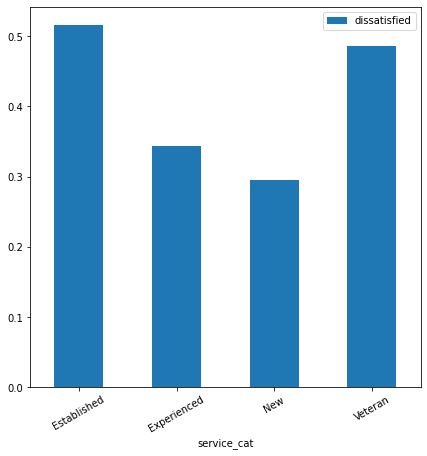

In [180]:
# Plot the results
%matplotlib inline
dis_pct.plot(kind='bar', rot=30, figsize=(7,7))

> **Note** : From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, we need to handle the rest of the missing data to finalize our analysis.


In this guided project, we experienced that in order to extract any meaningful insights from our data, we had to perform many data cleaning tasks. In order to create one visualization (and not even the final one), we completed the following tasks:

- Explored the data and figured out how to prepare it for analysis
- Corrected some of the missing values
- Dropped any data not needed for our analysis
- Renamed our columns
- Verified the quality of our data
- Created a new institute_service column
- Cleaned the Contributing Factors columns
- Created a new column indicating if an employee resigned because they were dissatisfied in some way
- Combined the data
- Cleaned the institute_service column
- Handled the missing values in the dissatisfied column
- Aggregated the data

